Last updated: 15 Feb 2023

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [2]:
# STEP 1 — confirm your Python version (should be 3.12)
import sys
print(sys.version)

# STEP 2 — upgrade pip and dependencies
!pip install -U pip setuptools wheel scikit-learn>=1.4

# STEP 3 — install PyCaret directly from GitHub (latest main/master branch supports 3.12)
!pip install -U git+https://github.com/pycaret/pycaret.git@master

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-zm6b35es
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-zm6b35es
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requi

In [1]:
!pip install -U numpy==1.26.4 optuna scipy pandas matplotlib seaborn lightgbm xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 41.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 67.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 50.9 MB/s  0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 58.5 MB/s  0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.0
    Uninstalling xgboost-3.1.0:
      Successfully uninstalled xgboost-3.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib

In [1]:
import pycaret
import numpy as np
print(np.__version__)
print(pycaret.__version__)

1.26.4
3.4.0


In [8]:
from pycaret.datasets import get_data

# Get the index of all available datasets
dataset_index = get_data('index')

# Display the full list
display(dataset_index)

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [9]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [10]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'Price', session_id = 123,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [11]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [12]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [13]:
# init setup on exp
exp.setup(data, target = 'Price', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [14]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,8001.7171,98752699.1690,9922.1803,0.0330,0.8245,0.9590,0.1960
en,Elastic Net,7357.2377,103444039.7854,10146.7119,-0.0012,0.7592,0.8942,0.1420
dummy,Dummy Regressor,7359.1861,103457199.1884,10147.6696,-0.0014,0.7592,0.8943,0.1470
br,Bayesian Ridge,7359.8344,103505014.7032,10149.8861,-0.0018,0.7593,0.8943,0.3250
omp,Orthogonal Matching Pursuit,7360.3292,103594964.5638,10153.9571,-0.0026,0.7597,0.8942,0.1800
lasso,Lasso Regression,7381.3748,104102837.0567,10178.1004,-0.0072,0.7621,0.8973,0.2460
llar,Lasso Least Angle Regression,7381.4028,104101952.2944,10178.0692,-0.0072,0.7621,0.8973,0.1860
ridge,Ridge Regression,7382.5424,104118444.1679,10178.8980,-0.0074,0.7622,0.8975,0.1530
lr,Linear Regression,7384.0996,104137239.2093,10179.7992,-0.0076,0.7623,0.8976,0.2380
gbr,Gradient Boosting Regressor,7459.9879,106658085.9296,10301.1726,-0.0316,0.7698,0.9073,0.5140


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

[2025-10-28 07:37:26.277] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization
[2025-10-28 07:37:26.278] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


In [15]:
# compare models using OOP
# exp.compare_models()

In [16]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7779.6842,115519397.9294,10747.9951,-0.0403,0.8191,1.0116
1,7074.3843,85948344.3965,9270.8330,-0.0437,0.7464,0.8784
2,7392.7611,116201360.2901,10779.6735,-0.0373,0.7706,0.9033
3,7821.1208,114890345.9618,10718.6914,-0.0241,0.7746,0.8904
4,7453.0847,107662686.1722,10376.0631,-0.0568,0.7870,0.9368
5,6991.7539,87405296.2391,9349.0800,-0.0079,0.7508,0.8935
6,8057.2991,138526345.8001,11769.7216,-0.0417,0.7898,0.9190
7,7743.8790,104415998.5166,10218.4147,-0.0305,0.7847,0.9275
8,7688.8906,108752862.8463,10428.4641,-0.0488,0.7809,0.9171


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

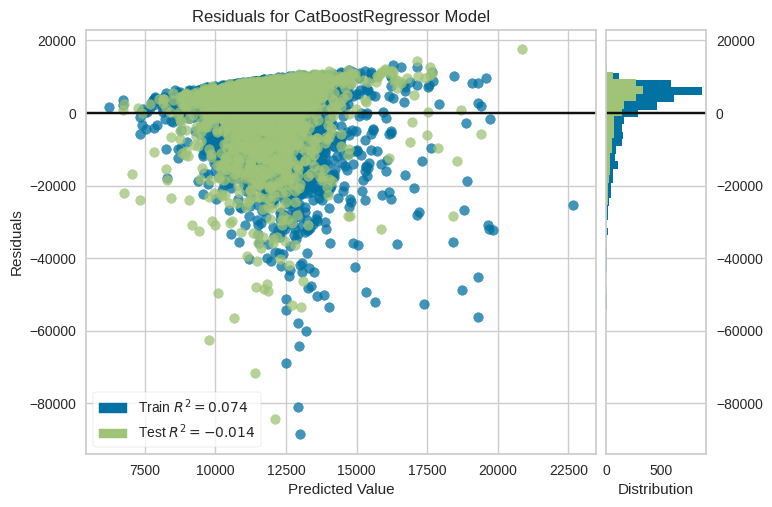

In [17]:
# plot residuals
plot_model(best, plot = 'residuals')

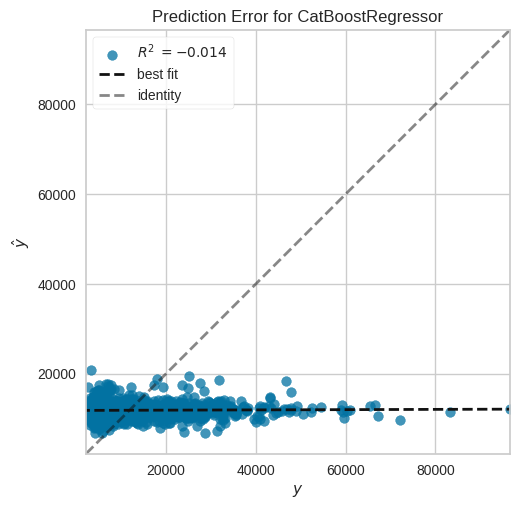

In [18]:
# plot error
plot_model(best, plot = 'error')

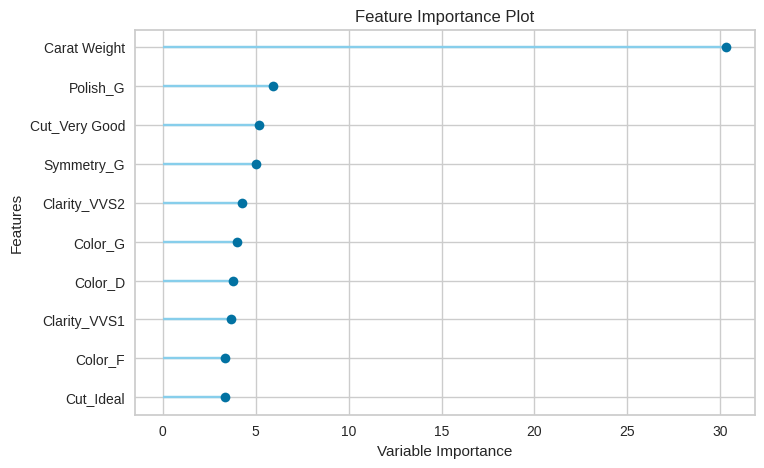

In [19]:
# plot feature importance
plot_model(best, plot = 'feature')

In [20]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [21]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [22]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,7471.4327,105836800.9149,10287.7014,-0.0143,0.7736,0.9193


In [23]:
# show predictions df
holdout_pred.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
1201,0.75,Ideal,G,VVS2,EX,EX,GIA,3879,10702.391227
1084,1.08,Ideal,F,SI1,VG,VG,GIA,5534,11902.235263
2060,1.29,Very Good,G,VS1,G,VG,GIA,9105,11194.498165
248,1.19,Ideal,G,VS1,ID,ID,AGSL,8034,11453.329395
5603,1.01,Very Good,E,SI1,VG,VG,GIA,5384,10687.110946


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Price`. We can then use the new data frame without labels for scoring.

In [24]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('Price', axis=1, inplace=True)
new_data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA


In [25]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,12339.185460
1,0.83,Ideal,H,VS1,ID,ID,AGSL,15374.400527
2,0.85,Ideal,H,SI1,EX,EX,GIA,12222.783505
3,0.91,Ideal,E,SI1,VG,VG,GIA,10590.760135
4,0.83,Ideal,G,SI1,EX,EX,GIA,13093.632564


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [26]:
# save pipeline
save_model(best, 'my_regression_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Rep...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',


In [28]:
# load pipeline
loaded_best_pipeline = load_model('my_regression_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(in...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7fae1582b1a0>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [31]:
s = setup(data, target = 'Price', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [32]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [33]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Carat Weight,Cut_Ideal,Cut_Very Good,Cut_Fair,Cut_Good,Cut_Signature-Ideal,Color_H,Color_E,Color_G,Color_D,...,Clarity_FL,Polish_VG,Polish_ID,Polish_EX,Polish_G,Symmetry_EX,Symmetry_ID,Symmetry_VG,Symmetry_G,Report
0,1.10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.83,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.85,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.91,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,1.24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5994,0.81,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5995,1.03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5996,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [34]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [35]:
# help(setup)

In [36]:
# init setup with normalize = True
s = setup(data, target = 'Price', session_id = 123,use_gpu= True, normalize = True, normalize_method = 'minmax')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

<Axes: >

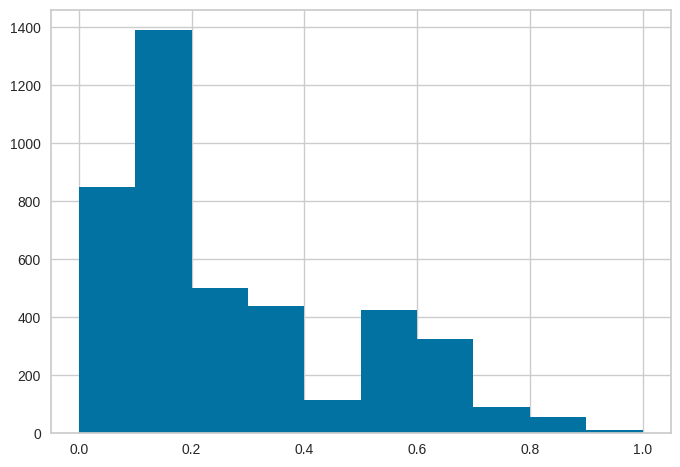

In [37]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Carat Weight'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

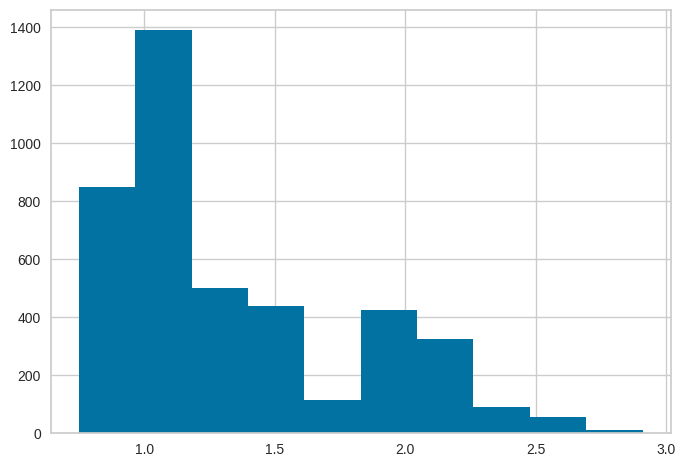

In [38]:
get_config('X_train')['Carat Weight'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [39]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,7990.1638,98776040.6705,9923.3185,0.0328,0.8240,0.9562,0.1440
en,Elastic Net,7357.4014,103448970.4131,10146.9700,-0.0012,0.7592,0.8942,0.1470
dummy,Dummy Regressor,7359.1861,103457199.1884,10147.6696,-0.0014,0.7592,0.8943,0.1490
br,Bayesian Ridge,7360.2035,103519727.2676,10150.5915,-0.0019,0.7594,0.8944,0.2810
omp,Orthogonal Matching Pursuit,7360.3292,103594964.5638,10153.9571,-0.0026,0.7597,0.8942,0.1920
lasso,Lasso Regression,7381.3724,104102970.2100,10178.1093,-0.0072,0.7621,0.8973,0.2000
llar,Lasso Least Angle Regression,7381.3994,104102068.0393,10178.0772,-0.0072,0.7621,0.8973,0.2610
ridge,Ridge Regression,7382.5405,104118431.7484,10178.8977,-0.0074,0.7622,0.8975,0.1620
lr,Linear Regression,7384.0996,104137239.2093,10179.7992,-0.0076,0.7623,0.8976,0.2230
gbr,Gradient Boosting Regressor,7460.0939,106662181.8450,10301.3595,-0.0316,0.7698,0.9074,0.4470


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

[2025-10-28 07:44:56.196] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization
[2025-10-28 07:46:47.183] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization
[2025-10-28 07:46:47.184] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [40]:
# check available models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,cuml.linear_model.linear_regression.LinearRegr...,True
lasso,Lasso Regression,cuml.linear_model.lasso.Lasso,True
ridge,Ridge Regression,cuml.linear_model.ridge.Ridge,True
en,Elastic Net,cuml.linear_model.elastic_net.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [41]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7460.0939,106662181.8450,10301.3595,-0.0316,0.7698,0.9074,0.4440
rf,Random Forest Regressor,7448.7756,106607109.3087,10301.6182,-0.0324,0.7694,0.9028,0.5330
catboost,CatBoost Regressor,7482.4419,106976648.5223,10316.9133,-0.0348,0.7729,0.9106,6.7990
lightgbm,Light Gradient Boosting Machine,7606.6715,111289618.8847,10522.5858,-0.0764,0.7870,0.9214,0.5900
xgboost,Extreme Gradient Boosting,8171.8350,129938621.6860,11372.1531,-0.2588,0.8561,0.9861,0.3160
et,Extra Trees Regressor,8869.3404,166290880.6030,12863.3752,-0.6167,0.9138,1.0346,1.1830
dt,Decision Tree Regressor,10070.2605,220855078.3346,14833.6558,-1.1569,1.0190,1.1914,0.1610


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [42]:
compare_tree_models

GradientBoostingRegressor(random_state=123)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [43]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7460.0939,1.066622e+08,10301.3595,-0.0316,0.7698,0.9074,0.444
rf,Random Forest Regressor,7448.7756,1.066071e+08,10301.6182,-0.0324,0.7694,0.9028,0.533
catboost,CatBoost Regressor,7482.4419,1.069766e+08,10316.9133,-0.0348,0.7729,0.9106,6.799
lightgbm,Light Gradient Boosting Machine,7606.6715,1.112896e+08,10522.5858,-0.0764,0.7870,0.9214,0.590
xgboost,Extreme Gradient Boosting,8171.8350,1.299386e+08,11372.1531,-0.2588,0.8561,0.9861,0.316
et,Extra Trees Regressor,8869.3404,1.662909e+08,12863.3752,-0.6167,0.9138,1.0346,1.183
dt,Decision Tree Regressor,10070.2605,2.208551e+08,14833.6558,-1.1569,1.0190,1.1914,0.161


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [44]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,6591.2906,118548802.4188,10862.1515,-0.1474,0.7233,0.5473,0.1980
huber,Huber Regressor,6636.8944,112315735.5540,10571.7386,-0.0866,0.7108,0.6143,0.7330
en,Elastic Net,7357.4014,103448970.4131,10146.9700,-0.0012,0.7592,0.8942,0.1420
dummy,Dummy Regressor,7359.1861,103457199.1884,10147.6696,-0.0014,0.7592,0.8943,0.1940
br,Bayesian Ridge,7360.2035,103519727.2676,10150.5915,-0.0019,0.7594,0.8944,0.2310
omp,Orthogonal Matching Pursuit,7360.3292,103594964.5638,10153.9571,-0.0026,0.7597,0.8942,0.1910
lasso,Lasso Regression,7381.3724,104102970.2100,10178.1093,-0.0072,0.7621,0.8973,0.1940
llar,Lasso Least Angle Regression,7381.3994,104102068.0393,10178.0772,-0.0072,0.7621,0.8973,0.2390
ridge,Ridge Regression,7382.5405,104118431.7484,10178.8977,-0.0074,0.7622,0.8975,0.1620
lr,Linear Regression,7384.0996,104137239.2093,10179.7992,-0.0076,0.7623,0.8976,0.1960


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

[2025-10-28 07:49:01.218] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


In [45]:
# list of top 3 models by MAE
best_mae_models_top3

[PassiveAggressiveRegressor(random_state=123), HuberRegressor(), ElasticNet()]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [46]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [47]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [48]:
# compare models
# best = compare_models()

In [49]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [50]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [51]:
# check all the available models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,cuml.linear_model.linear_regression.LinearRegr...,True
lasso,Lasso Regression,cuml.linear_model.lasso.Lasso,True
ridge,Ridge Regression,cuml.linear_model.ridge.Ridge,True
en,Elastic Net,cuml.linear_model.elastic_net.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [52]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7745.8802,114101083.9988,10681.8109,-0.0275,0.8078,0.9899
1,7053.7290,83073122.2367,9114.4458,-0.0087,0.7428,0.8871
2,7256.4831,112274900.7402,10595.9851,-0.0022,0.7568,0.8831
3,7748.3601,114589864.7962,10704.6656,-0.0214,0.7713,0.8823
4,7282.6598,101259408.1650,10062.7734,0.0060,0.7656,0.9144
5,6940.3088,86536714.2550,9302.5112,0.0021,0.7469,0.8881
6,7898.5957,133850270.2430,11569.3678,-0.0066,0.7727,0.8975
7,7636.3365,102029944.8308,10100.9873,-0.0070,0.7738,0.9140
8,7502.8826,104345618.4054,10214.9703,-0.0063,0.7644,0.8960


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [53]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7745.8802,1.141011e+08,10681.8109,-0.0275,0.8078,0.9899
1,7053.7290,8.307312e+07,9114.4458,-0.0087,0.7428,0.8871
2,7256.4831,1.122749e+08,10595.9851,-0.0022,0.7568,0.8831
3,7748.3601,1.145899e+08,10704.6656,-0.0214,0.7713,0.8823
4,7282.6598,1.012594e+08,10062.7734,0.0060,0.7656,0.9144
5,6940.3088,8.653671e+07,9302.5112,0.0021,0.7469,0.8881
6,7898.5957,1.338503e+08,11569.3678,-0.0066,0.7727,0.8975
7,7636.3365,1.020299e+08,10100.9873,-0.0070,0.7738,0.9140
8,7502.8826,1.043456e+08,10214.9703,-0.0063,0.7644,0.8960


In [54]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7332.0977,100868075.9729,10043.3100,-0.0014,0.7660,0.9197
1,7468.9526,108851195.7888,10433.1776,-0.0180,0.7690,0.9052
2,7359.7509,103239038.6547,10160.6613,-0.0065,0.7554,0.8740
Mean,7386.9338,104319436.8054,10212.3830,-0.0086,0.7635,0.8996
Std,59.0847,3347436.3944,163.3106,0.0069,0.0058,0.0191


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [55]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7745.8802,114101083.9988,10681.8109,-0.0275,0.8078,0.9899
1,7053.7290,83073122.2367,9114.4458,-0.0087,0.7428,0.8871
2,7256.4831,112274900.7402,10595.9851,-0.0022,0.7568,0.8831
3,7748.3601,114589864.7962,10704.6656,-0.0214,0.7713,0.8823
4,7282.6598,101259408.1650,10062.7734,0.0060,0.7656,0.9144
5,6940.3088,86536714.2550,9302.5112,0.0021,0.7469,0.8881
6,7898.5957,133850270.2430,11569.3678,-0.0066,0.7727,0.8975
7,7636.3365,102029944.8308,10100.9873,-0.0070,0.7738,0.9140
8,7502.8826,104345618.4054,10214.9703,-0.0063,0.7644,0.8960


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression()

In [56]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression()

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [57]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [58]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9805.2976,202387783.4104,14226.3060,-0.8225,0.9931,1.2616
1,9833.2577,200406162.9440,14156.4884,-1.4335,1.0032,1.2166
2,10062.4338,250012941.5649,15811.7975,-1.2317,1.0110,1.1787
3,10461.3848,212061011.0874,14562.3148,-0.8902,1.0477,1.1712
4,10287.2823,237199913.2780,15401.2958,-1.3284,1.0295,1.2398
5,9923.9170,221562465.4770,14884.9745,-1.5549,1.0265,1.2445
6,10760.1536,275004954.2678,16583.2733,-1.0681,1.0579,1.2205
7,10828.3500,235394971.4748,15342.5869,-1.3232,1.0465,1.2285
8,9463.7114,183910148.7715,13561.3476,-0.7736,1.0013,1.1028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7661.1697,111592892.5989,10563.7537,-0.0049,0.7976,0.9786
1,7051.1825,82417410.2266,9078.4035,-0.0008,0.7411,0.8859
2,7266.9359,112879752.5166,10624.4883,-0.0076,0.7581,0.8826
3,7700.2029,113129741.1496,10636.2466,-0.0084,0.7661,0.8793
4,7319.2575,102040223.1118,10101.4961,-0.0016,0.7666,0.9126
5,6942.3683,86475487.8940,9299.2197,0.0028,0.7476,0.8899
6,7846.3064,133879655.9174,11570.6377,-0.0068,0.7694,0.8896
7,7628.5821,101749325.2472,10087.0871,-0.0042,0.7711,0.9087
8,7523.3008,103985471.8034,10197.3267,-0.0028,0.7640,0.9000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [60]:
dt

DecisionTreeRegressor(random_state=123)

In [61]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7617.3017,111010521.8867,10536.1531,0.0003,0.7939,0.9711
1,7100.3545,83936764.5083,9161.7010,-0.0192,0.7463,0.8959
2,7248.4325,112329171.4110,10598.5457,-0.0027,0.7567,0.8806
3,7751.1695,114165131.5135,10684.8084,-0.0176,0.7700,0.8846
4,7300.8944,101751159.4997,10087.1780,0.0012,0.7667,0.9133
5,6998.4409,87671809.0994,9363.3225,-0.0110,0.7531,0.8989
6,7838.4465,133180454.4360,11540.3836,-0.0015,0.7689,0.8887
7,7654.4433,102410505.8029,10119.8076,-0.0107,0.7741,0.9131
8,7553.0775,104602775.5995,10227.5498,-0.0087,0.7671,0.9058


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [62]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7661.1697,111592892.5989,10563.7537,-0.0049,0.7976,0.9786
1,7051.1825,82417410.2266,9078.4035,-0.0008,0.7411,0.8859
2,7266.9359,112879752.5166,10624.4883,-0.0076,0.7581,0.8826
3,7700.2029,113129741.1496,10636.2466,-0.0084,0.7661,0.8793
4,7319.2575,102040223.1118,10101.4961,-0.0016,0.7666,0.9126
5,6942.3683,86475487.8940,9299.2197,0.0028,0.7476,0.8899
6,7846.3064,133879655.9174,11570.6377,-0.0068,0.7694,0.8896
7,7628.5821,101749325.2472,10087.0871,-0.0042,0.7711,0.9087
8,7523.3008,103985471.8034,10197.3267,-0.0028,0.7640,0.9000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
# model object
tuned_dt

DecisionTreeRegressor(max_depth=1, max_features=1.0, min_impurity_decrease=0.01,
                      min_samples_leaf=6, min_samples_split=5,
                      random_state=123)

In [64]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Carat '
                                                                          'Weight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['Cut',
                                                                          'Color',
                                                                          'Clarity',
                                                                          'Polish',
                                                                          'Symmetry',
                                                                          'Report'],
                                                                 transformer=SimpleImp...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123,

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [66]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8844.5234,148277774.7986,12176.9362,-0.3353,0.9191,1.2159
1,8200.4507,120140519.7356,10960.8631,-0.4588,0.8558,1.0613
2,8176.6454,136920922.4562,11701.3214,-0.2222,0.8475,1.0167
3,9150.6372,154270143.0636,12420.5533,-0.3751,0.8930,1.0619
4,8369.4549,130061230.8634,11404.4391,-0.2767,0.8634,1.0528
5,7786.5264,113994168.5025,10676.8052,-0.3145,0.8362,1.0033
6,8648.5989,164652767.5864,12831.7095,-0.2382,0.8562,1.0056
7,8554.9502,133242560.0418,11543.0741,-0.3150,0.8578,1.0363
8,8491.8584,131895624.1894,11484.5820,-0.2719,0.8641,1.0398


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123), n_jobs=1,
                 random_state=123)

In [67]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8551.2457,155421405.4803,12466.8122,-0.3996,0.9189,1.0429
1,8140.0114,135358844.7737,11634.3820,-0.6436,0.8784,0.9289
2,8345.3244,162800621.1418,12759.3347,-0.4532,0.8797,0.9369
3,9108.0203,175526419.1619,13248.6384,-0.5645,0.9239,0.9334
4,8647.6402,162956076.1935,12765.4250,-0.5996,0.9291,0.9981
5,7760.1060,127330037.8818,11284.0612,-0.4683,0.8721,0.8876
6,8987.9611,197872407.9892,14066.7128,-0.4880,0.9162,0.9405
7,8724.1052,156922903.7870,12526.8872,-0.5487,0.9018,0.9416
8,8830.3952,164161539.2722,12812.5540,-0.5831,0.9108,0.9746


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [68]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [69]:
# top 3 models based on mae
best_mae_models_top3

[PassiveAggressiveRegressor(random_state=123), HuberRegressor(), ElasticNet()]

In [70]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6880.0587,115625072.0218,10752.9099,-0.0412,0.7411,0.7284
1,6320.0016,85376468.3929,9239.9388,-0.0367,0.6860,0.6562
2,6666.0692,117615890.4962,10845.0860,-0.0499,0.7096,0.6660
3,7276.5111,121545122.6674,11024.7505,-0.0834,0.7331,0.6746
4,6692.7096,106277109.0579,10309.0790,-0.0432,0.7162,0.6902
5,6305.3443,90116287.6097,9492.9599,-0.0392,0.6931,0.6636
6,7140.9608,139918316.5846,11828.7073,-0.0522,0.7243,0.6643
7,7064.9853,108351116.5934,10409.1842,-0.0694,0.7298,0.6861
8,6831.4705,109088209.5144,10444.5301,-0.0520,0.7163,0.6734


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Passive Aggressive Regressor',
                             PassiveAggressiveRegressor(random_state=123)),
                            ('Huber Regressor', HuberRegressor()),
                            ('Elastic Net', ElasticNet())],
                n_jobs=1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [71]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [72]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7659.6395,111322244.5880,10550.9357,-0.0025,0.7968,0.9798
1,7030.4278,82411996.6605,9078.1053,-0.0007,0.7408,0.8847
2,7249.4252,112486140.1075,10605.9483,-0.0041,0.7552,0.8796
3,7686.4339,112947549.2700,10627.6785,-0.0067,0.7630,0.8720
4,7320.2994,102301229.3262,10114.4070,-0.0042,0.7674,0.9125
5,6972.6594,87103768.2018,9332.9400,-0.0044,0.7519,0.8985
6,7849.3333,133170792.4648,11539.9650,-0.0015,0.7688,0.8921
7,7620.4813,101484338.9665,10073.9436,-0.0016,0.7707,0.9099
8,7517.3514,103856158.1946,10190.9842,-0.0015,0.7634,0.9000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Passive Aggressive Regressor',
                               PassiveAggressiveRegressor(random_state=123)),
                              ('Huber Regressor', HuberRegressor()),
                              ('Elastic Net', ElasticNet())],
                  final_estimator=LinearRegression(), n_jobs=1)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [73]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

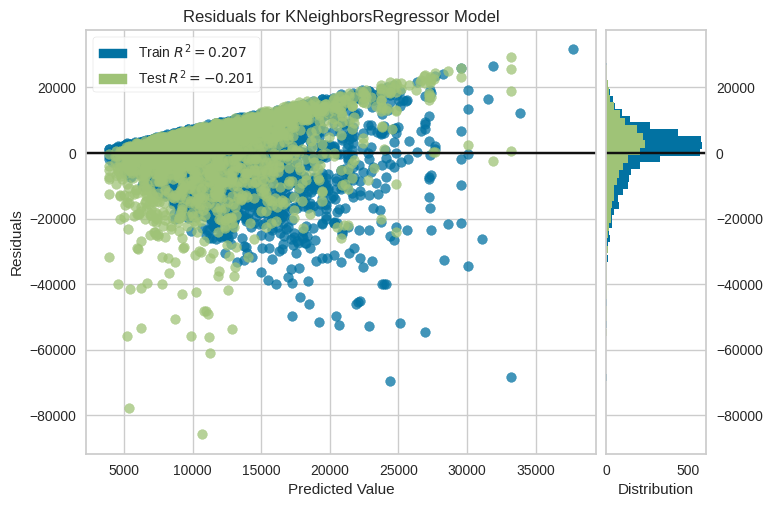

In [74]:
# plot residuals
plot_model(best, plot = 'residuals')

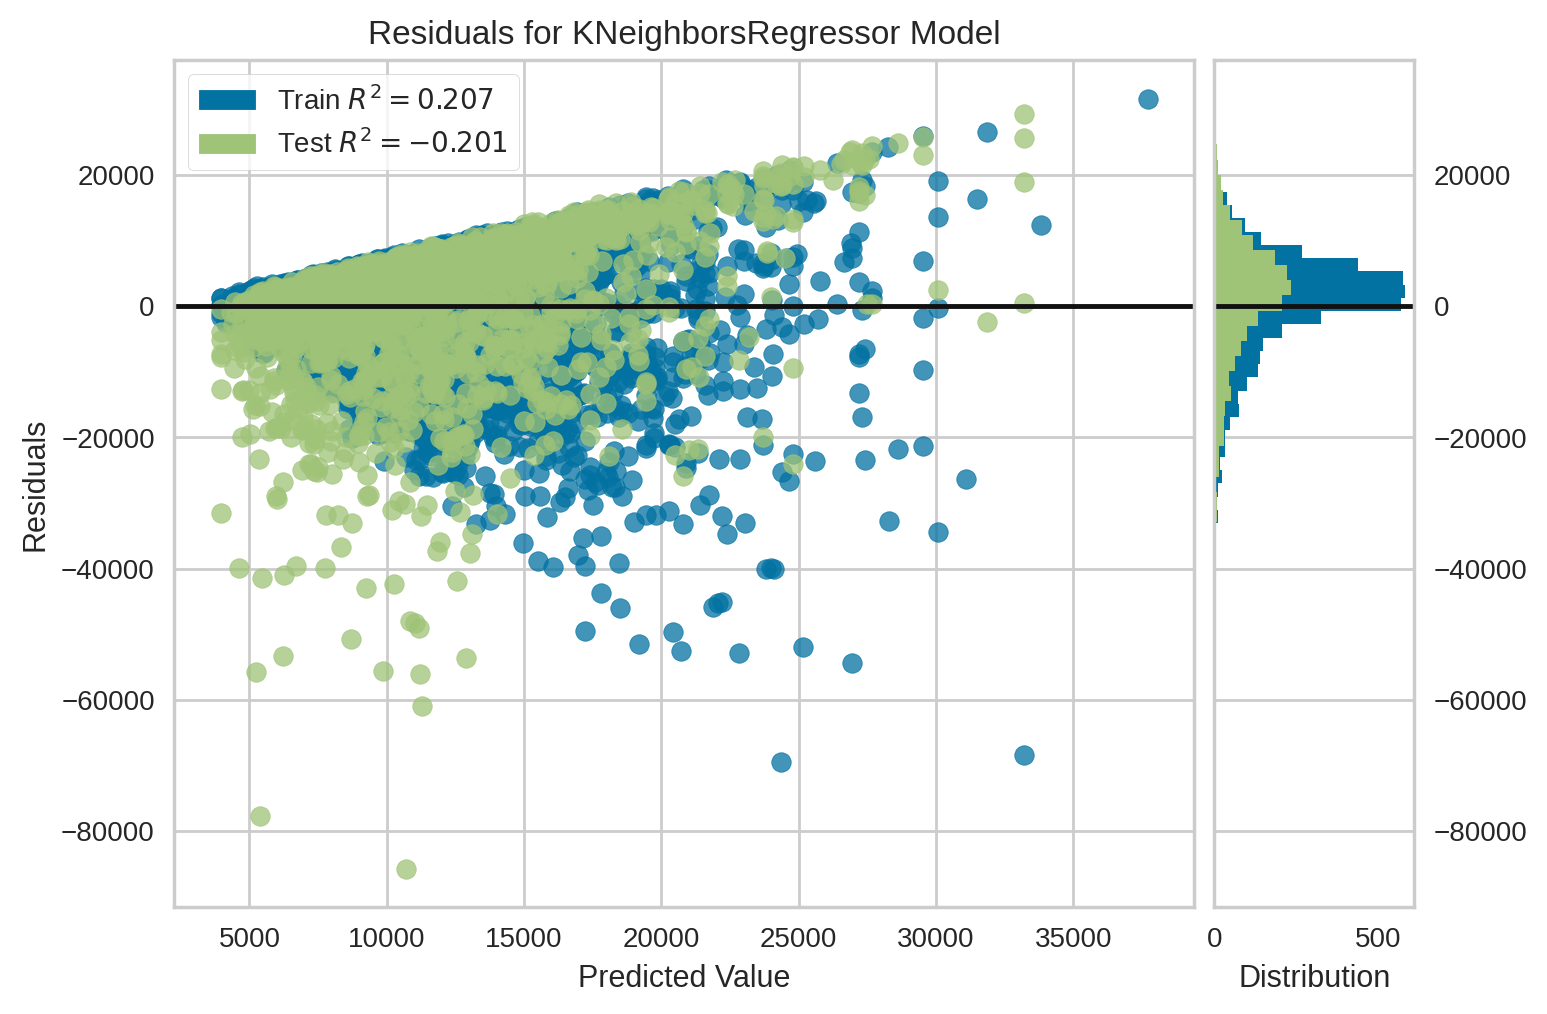

In [75]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [76]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [77]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [78]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7934.6396,119270896.6830,10921.1216,-0.0740,0.8354,1.0448
1,7050.9656,87444441.5040,9351.1733,-0.0618,0.7524,0.8795
2,7445.1991,119658674.0758,10938.8607,-0.0681,0.7846,0.9127
3,8135.0181,124105193.2905,11140.2510,-0.1062,0.8088,0.9176
4,7542.6462,111838500.1773,10575.3723,-0.0978,0.7958,0.9390
5,7140.4018,92135879.6708,9598.7437,-0.0625,0.7669,0.9076
6,8172.0265,142241760.8848,11926.5150,-0.0697,0.8018,0.9226
7,7812.4396,107681416.0911,10376.9656,-0.0628,0.7952,0.9271
8,7876.8885,114523873.2823,10701.5827,-0.1044,0.8002,0.9386


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

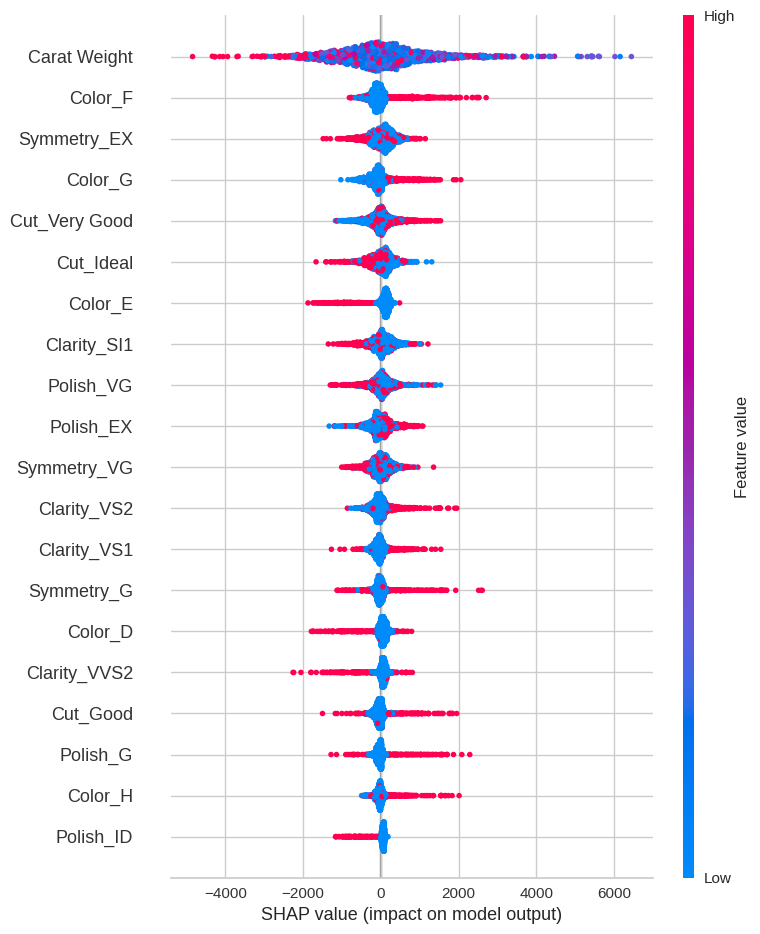

In [79]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [80]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [81]:
# help(interpret_model)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [82]:
# find best model based on CV metrics
automl()

[2025-10-28 07:57:34.706] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization
[2025-10-28 07:57:34.707] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


KNeighborsRegressor()